## Init

In [1]:
import datetime
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [2]:
df_train = pd.read_csv(
    "../data/train_data_cleaned.csv",
    # Note: some of the variables should be treated as 
    dtype={"year_week": str, "recipe_id": str},
)
df_train["week_day"] = df_train.year_week.apply(
    lambda year_week: datetime.datetime.strptime(year_week + '-1', "%G%V-%u")
)
df_train.shape

(2939, 28)

In [3]:
df_test = pd.read_csv(
    "../data/test_data_cleaned.csv",
    # Note: some of the variables should be treated as 
    dtype={"year_week": str, "recipe_id": str},
)
df_test["week_day"] = df_test.year_week.apply(
    lambda year_week: datetime.datetime.strptime(year_week + '-1', "%G%V-%u")
)
df_test.shape

(320, 28)

In [4]:
df_pred = pd.read_csv("../data/test_predictions.csv", dtype={"year_week": str, "recipe_id": str})
df_pred["week_day"] = df_pred.year_week.apply(
    lambda year_week: datetime.datetime.strptime(year_week + '-1', "%G%V-%u")
)
df_pred.head()

,recipe_id,year_week,predicted_sales,week_day
0,38287,201945,3255,2019-11-04
1,38309,201945,1139,2019-11-04
2,38310,201945,15,2019-11-04
3,38311,201945,2541,2019-11-04
4,38312,201945,870,2019-11-04


## Look the at the predictions

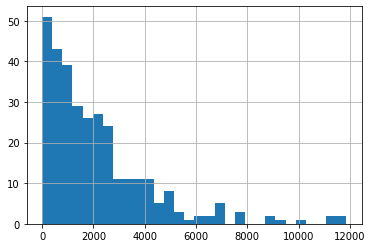

In [5]:
df_pred.predicted_sales.hist(bins=30);

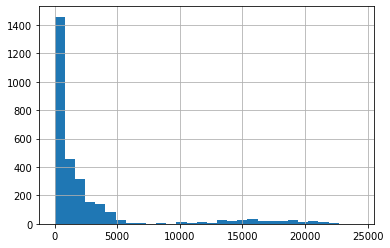

In [6]:
df_train.sales.hist(bins=30);

<AxesSubplot:>

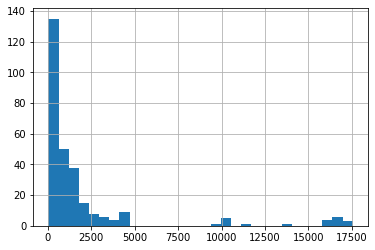

In [7]:
df_train[df_train.year_week >= "201938"].sales.hist(bins=30)

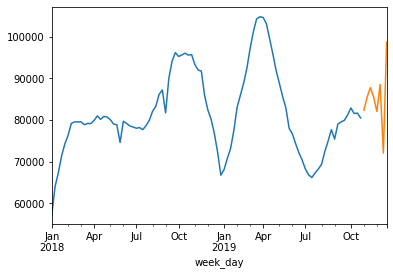

In [8]:
ax = df_train.groupby(["week_day"]).sales.sum().plot();
df_pred.groupby(["week_day"]).predicted_sales.sum().plot(ax=ax);